In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [2]:
os.chdir(r'C:\Users\cyb\ipnb\haha\280_Ben_八大直播八大案例配套课件\第三章\提交-第三讲：信用卡客户特征分析-产品客户画像初步\数据与脚本\4describe')

In [3]:
snd = pd.read_csv("sndHsPr.csv")

In [4]:
snd.head()

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268


In [5]:
snd.dtypes

dist        object
roomnum      int64
halls        int64
AREA       float64
floor       object
subway       int64
school       int64
price        int64
dtype: object

## 一个变量的处理<br />分类变量 dist ，房子所在地区

In [6]:
# dist 拼音转化为汉字
district = {'fengtai':'丰台区','haidian':'海淀区','chaoyang':'朝阳区','dongcheng':'东城区','xicheng':'西城区','shijingshan':'石景山区'}
snd['district'] = snd.dist.map(district)
snd.head()

,dist,roomnum,halls,AREA,floor,subway,school,price,district
0,chaoyang,1,0,46.06,middle,1,0,48850,朝阳区
1,chaoyang,1,1,59.09,middle,1,0,46540,朝阳区
2,haidian,5,2,278.95,high,1,1,71662,海淀区
3,haidian,3,2,207.00,high,1,1,57972,海淀区
4,fengtai,2,1,53.32,low,1,1,71268,丰台区


In [7]:
snd.dist.value_counts()

fengtai        2947
haidian        2919
chaoyang       2864
dongcheng      2783
xicheng        2750
shijingshan    1947
Name: dist, dtype: int64

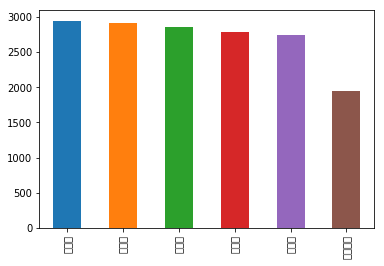

In [8]:
# value_counts() 返回的是 Series，所以可以直接用 plot 方法
snd.district.value_counts().plot(kind='bar')

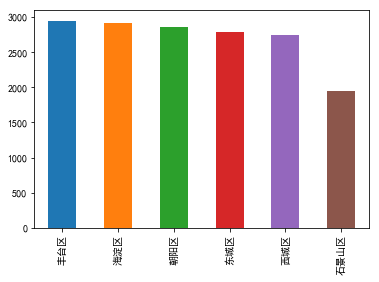

In [9]:
# 解决中文乱码问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是符号 '-' 显示为方块的问题
snd.district.value_counts().plot(kind='bar')# pie

## 连续变量<br />房价的均值、中位数、标准差、偏度

In [10]:
snd.price.mean(), snd.price.median() # 右偏

(61151.810919185686, 57473.0)

In [11]:
snd.price.std(), snd.price.skew() # skew > 1 右偏严重

(22293.358147328723, 0.6794935869486859)

In [12]:
snd.price.agg(['mean', 'median', 'std', 'skew', 'sum'])

mean      6.115181e+04
median    5.747300e+04
std       2.229336e+04
skew      6.794936e-01
sum       9.912709e+08
Name: price, dtype: float64

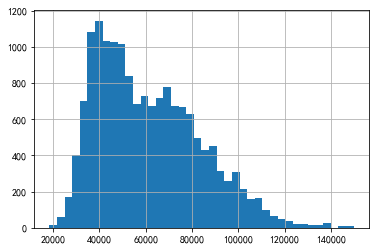

In [13]:
# 直方图观察分布
snd.price.hist(bins=40)

In [14]:
snd.price.quantile([0.01, 0.5, 0.99])

0.01     27104.45
0.50     57473.00
0.99    119996.85
Name: price, dtype: float64

## 两个变量的分析

In [15]:
sub_sch = pd.crosstab(snd.district, snd.school)
sub_sch

school,0,1
district,,
东城区,1508,1275
丰台区,2853,94
朝阳区,2267,597
海淀区,1533,1386
石景山区,1929,18
西城区,1207,1543


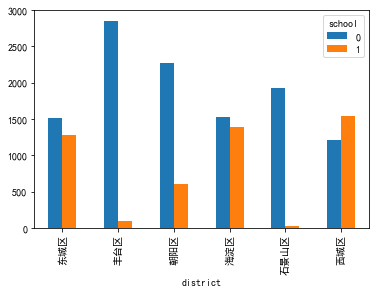

In [16]:
sub_sch.plot(kind='bar')

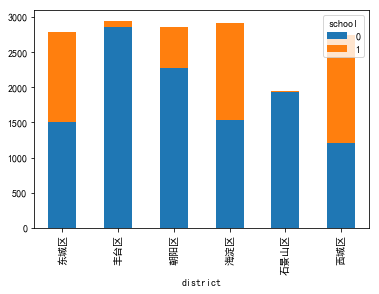

In [17]:
# 比较每个地区教育是否均衡，是否有些地区学区房较多，这时候用堆叠柱形图比较好
sub_sch.plot(kind='bar', stacked=True)

In [18]:
# 标准化了的堆叠柱形图，转化为比例
sub_sch['sum1'] = sub_sch.sum(1) # 按列汇总
sub_sch.head()

school,0,1,sum1
district,,,
东城区,1508,1275,2783
丰台区,2853,94,2947
朝阳区,2267,597,2864
海淀区,1533,1386,2919
石景山区,1929,18,1947


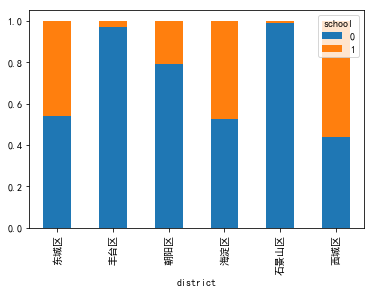

In [27]:
sub_sch = sub_sch.div(sub_sch.sum1, axis=0)
sub_sch[[0,1]].plot(kind='bar', stacked=True)

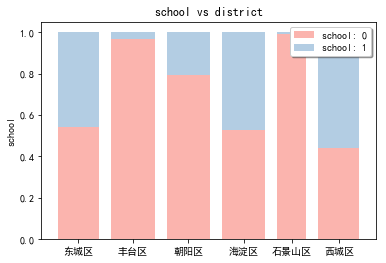

In [20]:
# 这样比较不了各个地区的房源数量，解决如下
from stack2dim import *
stack2dim(snd, i='district', j='school')

In [21]:
# 一个比较特殊的柱形图，地图 6:00

### 一个分类变量，一个连续变量的分析

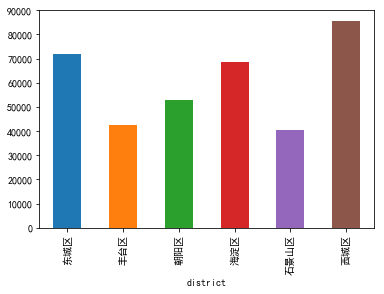

In [22]:
snd.price.groupby(snd.district).mean().plot(kind='bar')

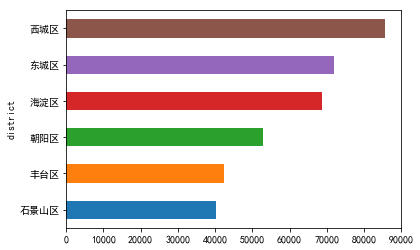

In [23]:
snd.price.groupby(snd.district).mean().sort_values(ascending=True).plot(kind='barh')

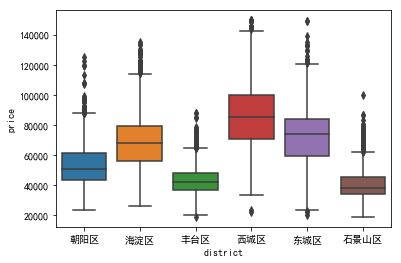

In [24]:
sns.boxplot(x='district', y='price', data=snd)

## 一个连续型变量与多个分类型变量的分析

In [25]:
snd.pivot_table(values='price', index='district', columns='school', aggfunc='mean')

school,0,1
district,,
东城区,66276.887931,78514.900392
丰台区,42291.003505,48871.617021
朝阳区,51588.511689,57403.405360
海淀区,61385.803653,76911.258297
石景山区,40353.883878,33107.333333
西城区,76989.369511,92468.873623


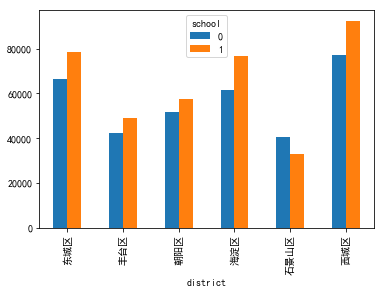

In [26]:
snd.pivot_table(values='price', index='district', columns='school', aggfunc='mean').plot(kind='bar')